170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - loss: 0.0310 - val_loss: 0.0137
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0135 - val_loss: 0.0115
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0113 - val_loss: 0.0104
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0103 - val_loss: 0.0106
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 9/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 10/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 11/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0083 - 

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


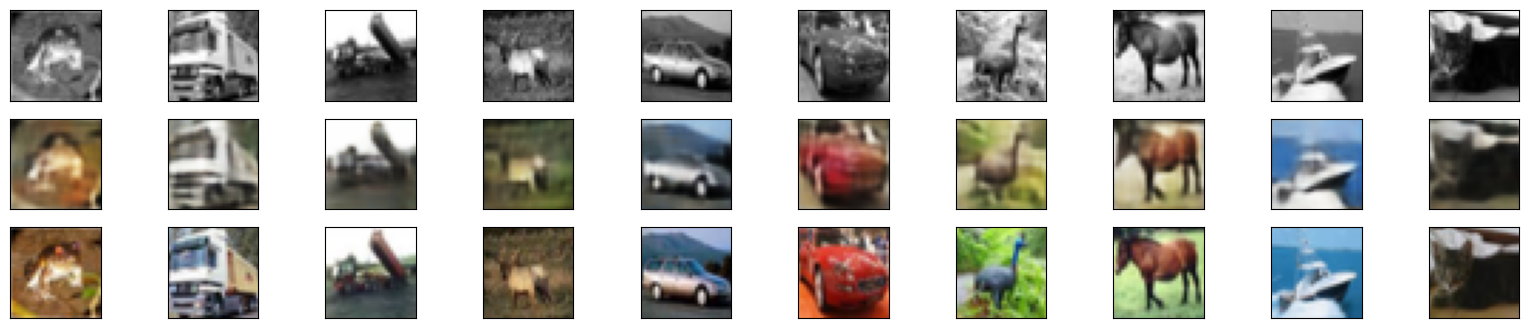

In [1]:
# Importing necessary libraries
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Convert images to grayscale
image = []
for i in range(50000):
    image.append(cv2.cvtColor(x_train[i], cv2.COLOR_RGB2GRAY))

# Convert the list to a numpy array and reshape to match input format
x_train_gray = np.array(image).astype('float32') / 255.0
x_train_gray = np.reshape(x_train_gray, (x_train_gray.shape[0], 32, 32, 1))

# Normalize the color images
x_train = x_train.astype('float32') / 255.0

# Building the Autoencoder model
input_img = Input(shape=(32, 32, 1))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
autoencoder.fit(x_train_gray, x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.1)

# Save the model
autoencoder.save('colorization_autoencoder.h5')

# Test the model on some images
decoded_imgs = autoencoder.predict(x_train_gray)

# Display the results
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original grayscale image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train_gray[i].reshape(32, 32), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction (colorized image)
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original color image
    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(x_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
